# <center> Оценка связи спроса на товары в группе


In [2]:
import numpy as np
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

import json

## Загрузка и обработка данных

In [16]:
data = pd.read_excel("q011.xlsx")

In [17]:
data.head(2)

,Код склада,Название склада,Дата,Код гр.,Название гр.,Код товара,1 наименование,2 наименование,кол-во,Сумма в пр.ценах,Сумма в ср. зак,Сумма в баз. Ценах,Стоимость одной штуки
0,E,Б Грузино хоз,2017-02-07,Q01,Бытовая химия,23141391,Щетка зубная Oral-B Advantage Artic,Щетка зубная Oral-B Advantage Artic,2,330.0,160.74,350.0,175.0
1,E,Б Грузино хоз,2017-02-07,Q01,Бытовая химия,23310100,Мыло Absolut 90г алоэ,Мыло Absolut 90г алоэ,1,33.0,21.53,35.0,35.0


### Переименование названий стоблцов

Будем иcпользовать имена из латинского алфавита, записанные в <b> snake_case</b>.

In [18]:
data.columns

Index(['Код склада', 'Название склада', 'Дата', 'Код гр.', 'Название гр.',
       'Код товара', '1 наименование', '2 наименование', 'кол-во',
       'Сумма в пр.ценах', 'Сумма в ср. зак', 'Сумма в баз. Ценах',
       'Стоимость одной штуки'],
      dtype='object')

In [19]:
new_columns = ['depo_code', 'depo_name', 'date', 'group_code', 'group_name', 'code', 'name_1', 'name_2', 'quantity', 'income', 'profit_1', 'profit_2', 'price']

In [20]:
new_columns_dict = dict(list(zip(data.columns, new_columns)))
new_columns_dict

{'Код склада': 'depo_code',
 'Название склада': 'depo_name',
 'Дата': 'date',
 'Код гр.': 'group_code',
 'Название гр.': 'group_name',
 'Код товара': 'code',
 '1 наименование': 'name_1',
 '2 наименование': 'name_2',
 'кол-во': 'quantity',
 'Сумма в пр.ценах': 'income',
 'Сумма в ср. зак': 'profit_1',
 'Сумма в баз. Ценах': 'profit_2',
 'Стоимость одной штуки': 'price'}

In [21]:
data.columns = new_columns

In [22]:
data.head(2)

,depo_code,depo_name,date,group_code,group_name,code,name_1,name_2,quantity,income,profit_1,profit_2,price
0,E,Б Грузино хоз,2017-02-07,Q01,Бытовая химия,23141391,Щетка зубная Oral-B Advantage Artic,Щетка зубная Oral-B Advantage Artic,2,330.0,160.74,350.0,175.0
1,E,Б Грузино хоз,2017-02-07,Q01,Бытовая химия,23310100,Мыло Absolut 90г алоэ,Мыло Absolut 90г алоэ,1,33.0,21.53,35.0,35.0


Сохраним изменения, запишем новые имена и преобразованную таблицу в отдельные файлы.

In [24]:
with open('column_names.json', 'w', encoding='utf-8') as f: 
    json.dump(new_columns_dict, f)

In [26]:
data.to_csv('data.csv') 

### (Начинать отсюда, если создан data.csv)

In [13]:
data = pd.read_csv('data.csv')
data.head()

,Unnamed: 0,depo_code,depo_name,date,group_code,group_name,code,name_1,name_2,quantity,income,profit_1,profit_2,price
0,0,E,Б Грузино хоз,2017-02-07,Q01,Бытовая химия,23141391,Щетка зубная Oral-B Advantage Artic,Щетка зубная Oral-B Advantage Artic,2,330.0,160.74,350.0,175.0
1,1,E,Б Грузино хоз,2017-02-07,Q01,Бытовая химия,23310100,Мыло Absolut 90г алоэ,Мыло Absolut 90г алоэ,1,33.0,21.53,35.0,35.0
2,2,E,Б Грузино хоз,2017-02-07,Q01,Бытовая химия,23310483,Паста зубная Семейная в тубе кора дуба,Паста зубная Семейная в тубе кора дуба мать-ма...,1,44.0,24.08,45.0,45.0
3,3,E,Б Грузино хоз,2017-02-07,Q01,Бытовая химия,23320536,Прокладки гигиенические Libresse Инвизиб,Прокладки гигиенические Libresse Инвизибл Норм...,1,129.0,80.64,129.0,129.0
4,4,E,Б Грузино хоз,2017-02-07,Q01,Бытовая химия,23320680,Порошок зубной Мятный,Порошок зубной Мятный,1,28.0,16.23,29.0,29.0


## Группировка данных о товарах

In [23]:
data.group_code.unique() # одна группа

array(['Q01'], dtype=object)

In [24]:
data.code.unique().shape # 1886 уникальных товаров в группе

(1886,)

Воспользуемся вспомогательной функцией, описание в файле <b> Week-Month-Series</b>.

In [25]:
def addYearWeekDay(df, timestamp = ['year', 'week']): 
    try:
        if 'year' in timestamp:
            df['year'] = list(list(map(lambda x: x.year, df.date)))
        if 'week' in timestamp:
            df['week'] = list(list(map(lambda x: x.week, df.date)))
        if 'day' in timestamp:
            df['day'] = list(list(map(lambda x: x.year, df.date)))
        if 'month' in timestamp:
            df['month'] = list(list(map(lambda x: x.month, df.date)))
    except:
        print('Expected date column in df')
    return df
# Эта функция вытаскивает из даты год, неделю или день

In [26]:
data1 = addYearWeekDay(data, timestamp = ['year', 'month'])

In [27]:
sorted(data1[data1['code'] == 23141391][['quantity', 'year', 'month']].groupby(['year', 'month']).sum().index)

[(2017, 1),
 (2017, 2),
 (2017, 3),
 (2017, 4),
 (2017, 5),
 (2017, 6),
 (2017, 7),
 (2017, 8),
 (2017, 9),
 (2017, 10),
 (2017, 11),
 (2017, 12),
 (2018, 1),
 (2018, 2),
 (2018, 3),
 (2018, 4),
 (2018, 5),
 (2018, 6),
 (2018, 7),
 (2018, 8),
 (2018, 9),
 (2018, 10),
 (2018, 11),
 (2018, 12),
 (2019, 1),
 (2019, 2),
 (2019, 3),
 (2019, 4),
 (2019, 5),
 (2019, 6),
 (2019, 7),
 (2019, 8),
 (2019, 9),
 (2019, 10),
 (2019, 11),
 (2019, 12),
 (2020, 1),
 (2020, 2),
 (2020, 3),
 (2020, 4),
 (2020, 5),
 (2020, 6),
 (2020, 7),
 (2020, 8),
 (2020, 9),
 (2020, 10),
 (2020, 11),
 (2020, 12)]

Если группировать данные по неделям, получаем много пропусков в данных. Для оценки взаимосвязи будем использовать группировку <b>по месяцам</b>.

In [28]:
data1[['code', 'year', 'month', 'quantity']].groupby(['code', 'year', 'month']).sum().values.reshape(1, -1)[0]

array([3, 3, 9, ..., 1, 1, 3])

In [29]:
corr_data = []
corr_codes = []
wrong_codes = []
for code in list(data1.code.unique()):
    data_code = data1[data1['code'] == code][['year', 'month', 'quantity']].groupby(['year', 'month']).sum().values.reshape(1, -1)[0]
#     print(data_code.shape)
    if data_code.shape[0] == 48:
        corr_data.append(data_code)
        corr_codes.append(code)
    else:
        wrong_codes.append(code)
#         print(f'Not enougth data code {code}')

## Оценка корреляции между спросом на товары в группе

In [30]:
corr_data = np.array(corr_data)
corr_data

array([[ 2,  6,  4, ...,  4,  2,  1],
       [20, 42, 31, ..., 30, 25, 23],
       [13, 13, 17, ..., 16,  6,  7],
       ...,
       [ 3,  2,  1, ...,  6,  7,  7],
       [ 4,  5,  6, ...,  3,  5,  2],
       [ 5, 13,  6, ...,  4,  1,  3]])

In [31]:
corr_data.shape

(259, 48)

Полные данные получены для 259 кодовых названий из 1886. Посчитаем корреляционную матрицу.

In [33]:
corr_matrix = np.corrcoef(corr_data)
corr_matrix

array([[1.        , 0.6884695 , 0.84243815, ..., 0.35763291, 0.68046018,
        0.59661982],
       [0.6884695 , 1.        , 0.79877259, ..., 0.52321568, 0.48535847,
        0.46382742],
       [0.84243815, 0.79877259, 1.        , ..., 0.55305978, 0.66862356,
        0.60978379],
       ...,
       [0.35763291, 0.52321568, 0.55305978, ..., 1.        , 0.45995497,
        0.29248388],
       [0.68046018, 0.48535847, 0.66862356, ..., 0.45995497, 1.        ,
        0.73912748],
       [0.59661982, 0.46382742, 0.60978379, ..., 0.29248388, 0.73912748,
        1.        ]])

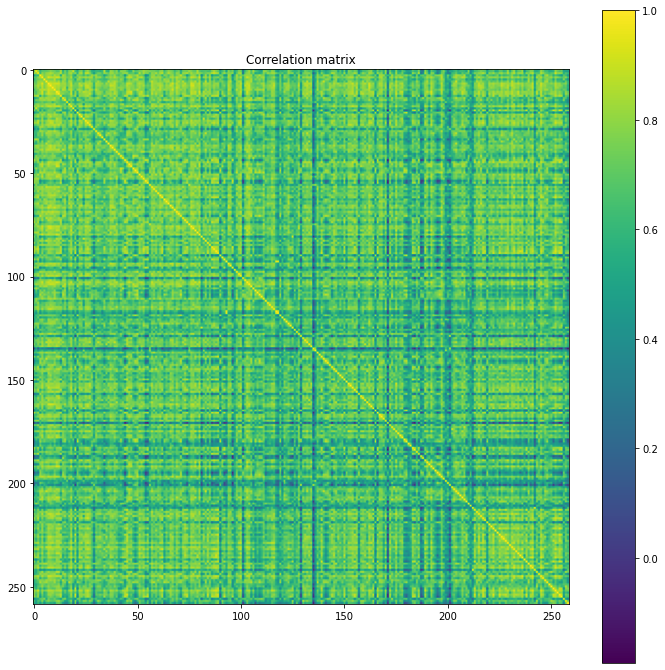

In [120]:
plt.figure(figsize=(12, 12))
plt.imshow(corr_matrix)
plt.colorbar()
plt.title('Correlation matrix')
plt.show()

Оценим влияние этой корреляции с помощью гистограммы.

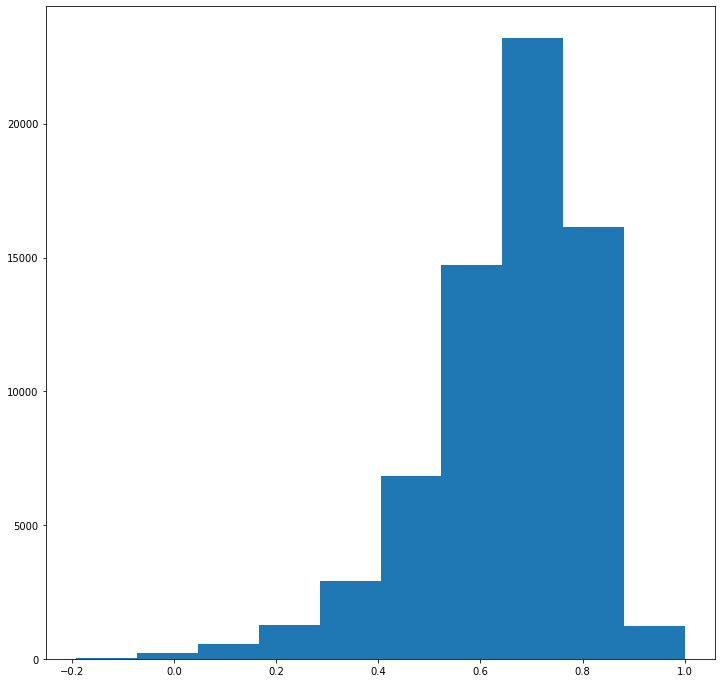

In [129]:
plt.figure(figsize=(12, 12))
plt.hist(corr_matrix.flatten())
plt.show()

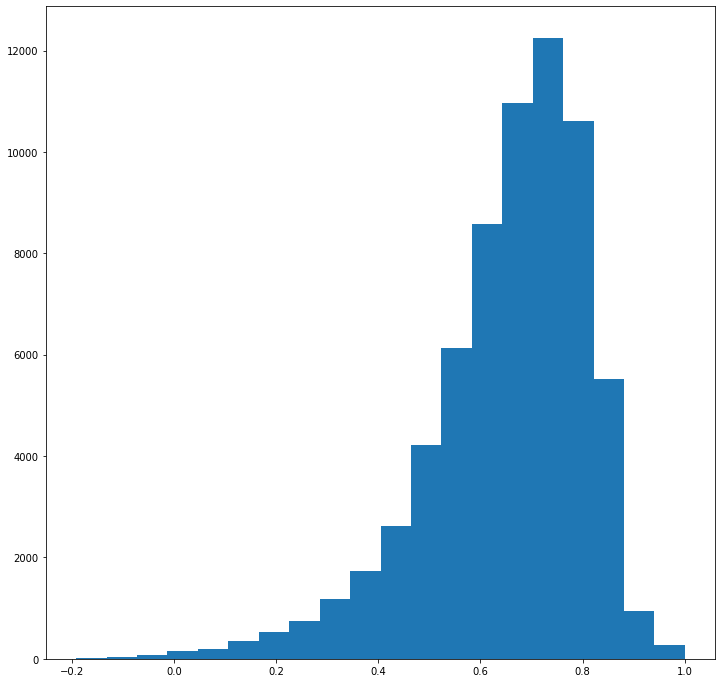

In [130]:
plt.figure(figsize=(12, 12))
plt.hist(corr_matrix.flatten(), bins = 20)
plt.show()

Результаты говорят о сильной положительной связи между спросом на различные товары в группе. 

## Вывод

### Увеличение спроса на один товар в группе влечёт увеличение спроса на остальные. Отсутсвие отрицательной связи позволяет нам максимизировать спрос на каждый товар в группе независимо от остальных.

## Товары с наибольшей корреляцией

In [43]:
correlated_pairs = []
n = corr_matrix.shape[0]
for i in range(n):
    for j in range(i + 1, n):
        if corr_matrix[i, j] >= 0.9:
            correlated_pairs.append((corr_codes[i], corr_codes[j]))

In [44]:
correlated_pairs

[(23310100, 23310117),
 (23310483, 23670440),
 (23310483, 24973816),
 (23320697, 23395152),
 (23320697, 23559097),
 (23320697, 23559202),
 (23320697, 23310490),
 (23320697, 24081832),
 (23320697, 23320635),
 (23395107, 23559059),
 (23395152, 23395169),
 (23395152, 23558748),
 (23395152, 23559097),
 (23395152, 23559202),
 (23395152, 23558779),
 (23395152, 23310490),
 (23395152, 23828377),
 (23395152, 24973847),
 (23395152, 24973854),
 (23395169, 23310490),
 (23395169, 23558670),
 (23395169, 23395145),
 (23395169, 23559226),
 (23395169, 23558854),
 (23395169, 23828377),
 (23558687, 23828377),
 (23558748, 23558779),
 (23559097, 23559202),
 (23559097, 23559219),
 (23559097, 24081832),
 (23559097, 23414648),
 (23559097, 23320635),
 (23559097, 23320666),
 (23559202, 23310070),
 (23559202, 23559042),
 (23559202, 23320666),
 (23670464, 23395145),
 (23310070, 23559172),
 (23310070, 23414648),
 (23310070, 23559042),
 (23310070, 23320666),
 (23310070, 24973854),
 (23310629, 23310087),
 (23310629,

In [45]:
corr_named_pairs = []
for pair in correlated_pairs:
    corr_named_pairs.append((data[data['code']== pair[0]].name_1.values[0], data[data['code']== pair[1]].name_1.values[0]))

In [46]:
corr_named_pairs

[('Мыло Absolut 90г алоэ', 'Мыло Absolut 90г детское календула'),
 ('Паста зубная Семейная в тубе кора дуба', 'Мыло жидкое ДИКАЯ РОЗА 5л'),
 ('Паста зубная Семейная в тубе кора дуба',
  'Освежитель воздуха Gold Wind После дождя'),
 ('Порошок зубной Отбеливающий', 'Паста зубная Мятная 100гр освежающая мят'),
 ('Порошок зубной Отбеливающий', 'Средство для очистки канализационных тру'),
 ('Порошок зубной Отбеливающий', 'Средство д/удаления накипи в стиральных'),
 ('Порошок зубной Отбеливающий', 'Паста зубная Семейная в тубе кедр.эликси'),
 ('Порошок зубной Отбеливающий', 'Средство для чистки труб КроТаран розовы'),
 ('Порошок зубной Отбеливающий', 'Средство для чистки фановых труб Крот ро'),
 ('Крем для рук и ногтей Весна Нежный компл',
  'Чистящее средство Санита спрей для стеко'),
 ('Паста зубная Мятная 100гр освежающая мят',
  'Паста зубная Природный бальзам 100гр кор'),
 ('Паста зубная Мятная 100гр освежающая мят',
  'Средство для мытья посуды Радуга Лимон 5'),
 ('Паста зубная Мятная 

In [49]:
with open('correlated_pairs.json', 'w') as f:
    json.dump(corr_named_pairs, f)